# MLP classification code along

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
import tensorflow

In [35]:
raw_data = load_breast_cancer()
# raw_data.keys()
X, y = raw_data.data, raw_data.target

print(f"Any NaN? {np.isnan(X).any()}")
X.shape, y.shape

Any NaN? False


((569, 30), (569,))

## Train|Test split

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## MLP network

In [37]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer

In [38]:
def MLP():
    model = Sequential(name = "MLP")
    model.add(InputLayer(X.shape[1], name = "Input_layer"))
    model.add(Dense(32, name = "Hidden1", activation = "relu")) # change to he initializer
    model.add(Dense(32, name = "Hidden2", activation = "relu"))
    model.add(Dense(1, name = "Output", activation = "sigmoid"))

    model.compile(loss = "binary_crossentropy", optimizer = "adam")
    return model

model = MLP()
model.summary()

Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 32)                992       
                                                                 
 Hidden2 (Dense)             (None, 32)                1056      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(scaled_X_train, y_train, epochs = 500, validation_split = .2, verbose = 1)

Epoch 1/500
12/12 [==============================] - 0s 4ms/step - loss: 0.5726 - val_loss: 0.4186
Epoch 2/500
12/12 [==============================] - 0s 1ms/step - loss: 0.3845 - val_loss: 0.3066
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 0.2806 - val_loss: 0.2435
Epoch 4/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2147 - val_loss: 0.2030
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1708 - val_loss: 0.1756
Epoch 6/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1369 - val_loss: 0.1562
Epoch 7/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1160 - val_loss: 0.1427
Epoch 8/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1012 - val_loss: 0.1335
Epoch 9/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0895 - val_loss: 0.1266
Epoch 10/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0807 - val_loss: 0.1206
Epoch 11/

In [40]:
import pandas as pd

df_loss = pd.DataFrame(model.history.history)

In [41]:
df_loss.head()

,loss,val_loss
0,0.572582,0.418566
1,0.384536,0.306566
2,0.280639,0.243542
3,0.214663,0.203023
4,0.170770,0.175566


<AxesSubplot:>

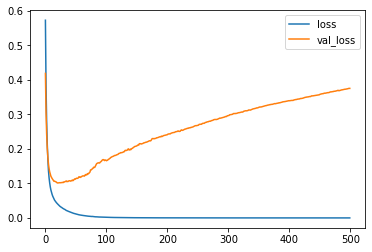

In [43]:
df_loss.plot()
# clear overfitting as vvalidation loss increases after a certain amount of epochs

# Early stopping

In [45]:
model = MLP()
model.summary()

Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 32)                992       
                                                                 
 Hidden2 (Dense)             (None, 32)                1056      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(scaled_X_train, y_train, epochs = 50, validation_split = .2, verbose = 1)

Epoch 1/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5243 - val_loss: 0.4194
Epoch 2/50
12/12 [==============================] - 0s 1ms/step - loss: 0.3608 - val_loss: 0.3222
Epoch 3/50
12/12 [==============================] - 0s 1ms/step - loss: 0.2637 - val_loss: 0.2629
Epoch 4/50
12/12 [==============================] - 0s 1ms/step - loss: 0.2013 - val_loss: 0.2234
Epoch 5/50
12/12 [==============================] - 0s 1ms/step - loss: 0.1607 - val_loss: 0.1940
Epoch 6/50
12/12 [==============================] - 0s 1ms/step - loss: 0.1341 - val_loss: 0.1769
Epoch 7/50
12/12 [==============================] - 0s 1ms/step - loss: 0.1155 - val_loss: 0.1648
Epoch 8/50
12/12 [==============================] - 0s 1ms/step - loss: 0.1013 - val_loss: 0.1558
Epoch 9/50
12/12 [==============================] - 0s 1ms/step - loss: 0.0910 - val_loss: 0.1493
Epoch 10/50
12/12 [==============================] - 0s 1ms/step - loss: 0.0825 - val_loss: 0.1437
Epoch 11/50
12/12 [

<AxesSubplot:>

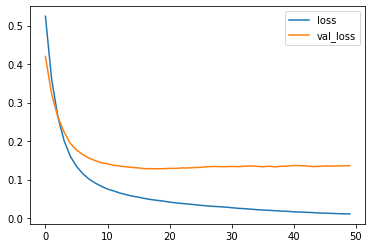

In [47]:
pd.DataFrame(model.history.history).plot()

In [48]:
model = MLP()
model.fit(scaled_X_train, y_train, epochs = 50, verbose = 0)

## Prediction and evaluation

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



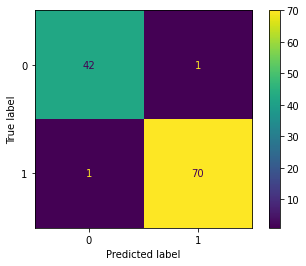

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(scaled_X_test)
#np.round(y_pred)
y_pred = (y_pred > 0.5) * 1 # threshold

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, y_pred))